<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 1.0 !important; }</style>';
</script>
<!--# STAT 207: Data Science Exploration-->

# <u>Case Study 14</u>: Logistic Regression

In this Case Study, we will model the approval for the President's Foreign Policy based on age and sex.

Our <u>response</u> variable of approval of the president's foreign policy (approve vs. disapprove) will be modeled from two <u>explanatory</u> variables: sex and age.

Consider the variable type for approval of the President's foreign policy.  

Unlike linear regression, when our response variable is quantitative, our response variable is now a categorical variable.  This will change our approach for modeling, although many similarities with linear regression remain.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Shortcomings of Linear Regression

Why should we not use a linear regression to model a categorical response variable?

Let's again examine our random sample of adults living in the U.S. (from 2017) from Pew Research. We will just use three variables for this analysis, so we will just create a dataframe using these three variables.

In [2]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
#
df = pd.read_csv('Feb17public.csv', 
                 na_values=missing_values)[['age','sex','q5cf1']]
df.head()

,age,sex,q5cf1
0,80.0,Female,NaN
1,70.0,Female,Disapprove
2,69.0,Female,Disapprove
3,50.0,Male,NaN
4,70.0,Female,Disapprove


In [3]:
df.shape

(1503, 3)

We will drop all missing values from the dataframe.

In [4]:
df=df.dropna()
df.head()

,age,sex,q5cf1
1,70.0,Female,Disapprove
2,69.0,Female,Disapprove
4,70.0,Female,Disapprove
6,89.0,Female,Disapprove
7,92.0,Female,Approve


The q5cf1 variable represents the answers to the question "Do you approve or disapprove of the way Donald Trump is handling the nation's foreign policy?"

**<u>Potential Bias Warning!</u>** It looks like only 691 respondants out of the 1503 surveyed responded to this question. These 691 people may have had a strong opinion on the question and thus chose to answer it. So it is possible that this sample of 691 respondants is not entirely representative of all adults living in the U.S. (the population we would like to make inferences about).

In [5]:
df.shape

(691, 3)

In [6]:
df['q5cf1'].value_counts()

Disapprove    442
Approve       249
Name: q5cf1, dtype: int64

### Visualizing Relationships in the Sample

Let's first examine the relationship between age and approval for the president's foreign policy in 2017 in the sample.

By looking at the box plots below, the median age of those that approved was over 10 years higher than the median age of those that did not approve.

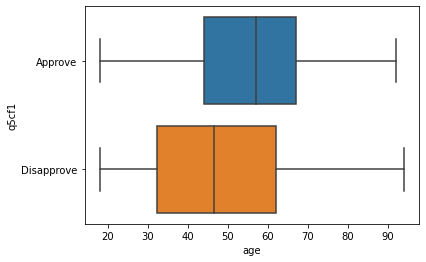

In [7]:
sns.boxplot(x='age', y='q5cf1', data=df, order=['Approve','Disapprove'])
plt.show()

### Turn the Categorical Variable into a Numerical Variable

Because we were interested in the relationship between a categorical variable and numerical variable, side-by-side boxplots (or side-by-side violin plots) tends to be one of the best visualizations for respresenting any association between the two variables. However, if we would like to try to plot a best fit line for the relationship between these two variables (like what we do in linear regression) we will need to first tranlate our categorical variable into a numerical variable.

Below we create a new variable 'y' in our dataframe in which all 'approve' values for q5cf1 are translated into a 1 and all 'disapprove' values for q5cf1 are translated into a 0.

The **.map()** function allows us to make this translation.

In [8]:
df['y']=df['q5cf1'].map({'Disapprove':0,'Approve':1})
df.head()

,age,sex,q5cf1,y
1,70.0,Female,Disapprove,0
2,69.0,Female,Disapprove,0
4,70.0,Female,Disapprove,0
6,89.0,Female,Disapprove,0
7,92.0,Female,Approve,1


In general, we call 

* the level in which y=1 the **success level** of the response variable (ie. the level that we are interested in) and
* the level in which y=0 the **failure level** of the response variable (ie. the level that we are not interested in).


### Fitting a Best Fit Line to the Data

Why shouldn't we fit a best fit <u>line</u> to this data?

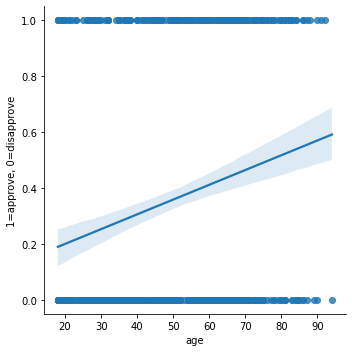

In [9]:
sns.lmplot(x="age", y='y',data=df)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

We can see that a best fit <u>line</u> shown above does not fit this data (or application) well at all.

Here are a couple of issues we would encounter if we fit this data with a <u>line</u>.

* <u>High Error</u>:The residuals for all of our predicted points will be quite high.
* <u>Unbounded Range of a Line</u>: Because the range of a line is $(-\infty,\infty)$, this line will go above 1 and below 0. So what would that mean to this problem???

In general, because we only defined two values y=1 and y=0 that have any actual meaning, what does it mean when our y is equal to a value that is NOT 1 or 0? 

When $y>1$ or $y<0$, we'll see that these values become more meaningless, however when $0\leq y\leq 1$, we can actually interpret meaning from these values.

## Logistic Regression Models

We can see that there are shortcomings to using a linear regression model.  What *can* we use instead.

You might imagine that we would want to fit a curve instead that is bounded between 0 and 1 when we have a categorical response variable (with 2 levels).

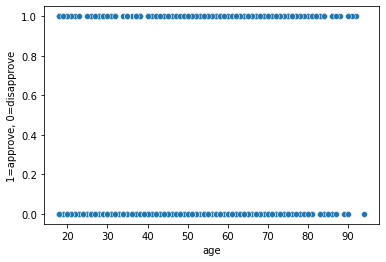

In [10]:
sns.scatterplot(x="age", y='y',data=df)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

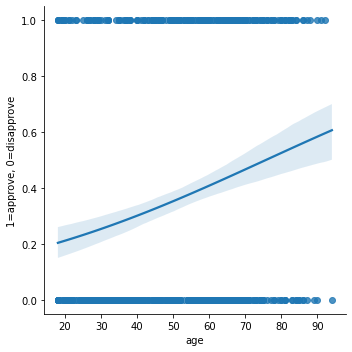

In [11]:
sns.lmplot(x="age", y='y',data=df, logistic=True)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

### Fitting the Model in Python

We will continue to use the **statsmodels.formula.api** package like we used to fit our linear regression models, however, in order to fit a logistic regression model, we will now use the **smf.logit()** function.

The way that we fit a logistic regression model using the **smf.logit()** function is fit is the same as the way that we fit a linear regression model using the **smf.ols()** function *except*, we specifically need to convert our categorical response variable into a 1/0 numerical variable and use that variable in the the equation.

**Notice how this doesn't work, when we simply just use the name of the categorical response varaible q5cf1 in our dataframe.**

In [12]:
mod1 = smf.logit(formula='q5cf1 ~ age', data=df).fit()
mod1.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (691, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

**We must use that 1/0 y variable that we translated from q5cf1 before.**

In [13]:
mod1 = smf.logit(formula='y ~ age', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.633703
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.03047
Time:                        23:30:57   Log-Likelihood:                -437.89
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 1.553e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7872      0.254     -7.023      0.000      -2.286      -1.288
age            0.0236      0.005      5.128      0.000       0.015       0.033
==============================================================================
"""

### Formulating the Logistic Regression Equation

Our logistic regression model (from our maximum likelihood estimation calculations) is as follows.

$log(\frac{\hat{p}}{1-\hat{p}}) = -1.7872+0.0236age$

<u>Notation</u>:
* Make sure to put a hat over the predictive probability p to indicate that this is a prediction.
* Put the variables into words.


### Extending to Multiple Logistic Regression

We can incorporate multiple explanatory variables into our logistic regression equation like we did for our multiple linear regression models.

In [14]:
mod1 = smf.logit(formula='y ~ age+sex', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.612754
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.06252
Time:                        23:31:03   Log-Likelihood:                -423.41
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 5.457e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3609      0.288     -8.190      0.000      -2.926      -1.796
sex[T.Male]     0.8856      0.167      5.296      0.000       0.558       1.213
age             0.0260      0.005      5.466      0.000       0.017       0.035
===============================================================================
"""

By incorporating sex as an explanatory variable as well (which gets translated into one 1/0 indicator variable sex[T.Male]), our new logistic regression model is as follows.

$log(\frac{\hat{p}}{1-\hat{p}}) = -2.3609+0.8856sex[T.Male]+0.0260age$

## Predictions for Logistic Regression Models

As before, one primary goal for regression is making predictions.

### Predicting Log Odds

Use this logistic regression model to predict the <u>log-odds</u> that a 20 year old female supports the president's foreign policy in this sample.

We can do this by hand.
$log(\frac{\hat{p}}{1-\hat{p}}) = -2.3609+0.8856(0)+0.0260(20) =-1.8409$

In [15]:
-2.3609+0.8856*(0)+0.0260*(20)

-1.8409

### Predicting Odds

Instead, I may want to predict the odds.

Use this logistic regression model to predict the <u>odds</u> that a 20 year old female supports the president's foreign policy in this sample.

Let's translate this prediction into something more meaningful. We can exponentiate both sides of our prediction equation to get the <u>odds</u> that this 20-year-old female supports the president's foreign policy.

$e^{log(\frac{\hat{p}}{1-\hat{p}})} = e^{-1.8409}$

$odds=\frac{\hat{p}}{1-\hat{p}} = .15867$


In [16]:
odds=np.exp(-1.8409)
odds

0.15867455472519007

Thus the odds that a 20 year old female supports the president's foreign policy is .159 (aka: 159 to 1000).

### Predicting Probabilities

Finally, let's use this logistic regression model to predict the <u>probability</u> that a 20 year old female supports the president's foreign policy in this sample.

Let's translate the odds into a probability, by using the equation $p=\frac{odds\_of\_success}{1+odds\_of\_success}$

In [17]:
prob=odds/(1+odds)
prob

0.13694488592858062

Thus the **predictive probability** that a 20 year old female supports president's foreign policy in this sample is 0.1369.

We can also do this using the Python **.predict()** function (using it in the same way that we did for linear regression models).

In [18]:
mod1.predict(exog=dict(sex='Female', age=20))

0    0.13701
dtype: float64

## Understanding Phenomenon for Logistic Regression Models

The second primary purpose of regression is in understanding phenomena.  This can be accomplished through interpretations of the fitted coefficients or through inference.

### Coefficient Interpretations

For example, interpret the values of $\hat{\beta}_0, \hat{\beta}_1,\hat{\beta}_2,...,\hat{\beta}_p$

In [19]:
np.exp(-2.3609)

0.09433528322414658

The estimated expected odds of approving of the president's foreign policy for a Female who is 0 years old is 0.0943. 

In [20]:
np.exp(.0260)

1.026340948473442

For each 1 year increase in the age of a person, the estimated expected odds of approving of the president's foreign policy will increase multiplicatively by 1.0263 times, holding the sex fixed.

In [21]:
np.exp(.8858)

2.4249235545605465

For a male compared to a female, the predicted expected odds of approving of the president's foreign policy will be 2.4249 times larger, holding age constant.

### Inference

Now, suppose that I want to make a reasonable statement about the population coefficients based on sample information.  To do this, I will need to perform inference for my logistic regression model.  How do I do this?  

The procedures themselves will be fairly similar.  

#### Checking Conditions

Let's start by checking conditions for the results of the inference to be valid and for the model fit to be appropriate.  

<u>Condition 1</u>: Independence of Observations Condition

a. [NOT SURE IF MET] While the initial survey of 1503 adults living in the U.S. was random, the sample of the n=691 people answered the question about the president's foreign policy was much smaller. So it may be possible that our sample size of n=691 is not random, as those that answered this question may have strong opinions about the matter.

b. [MET]$n=691<10$% of all adults living in the U.S.

So because we are not sure if both (a) and (b) are met, we are not sure if condition 1 is met.

<u>Condition 2</u>: Linearity Condition

We only have one numerical explanatory variable (age), so we will fit a simple logistic regression curve to the scatterplot of x=age and y=0/1 response variable.

We do see a *slight* S-Shape in this curve below, so we can say that this condition is met.

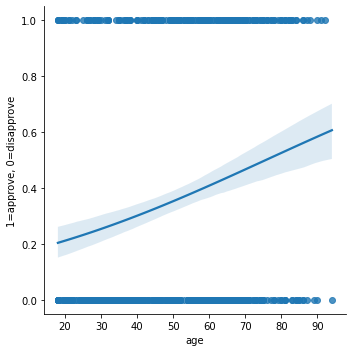

In [22]:
sns.lmplot(x="age", y='y',data=df, logistic=True)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

<u>Condition 3</u>: No Multi-Collinearity Condition

We only have one numerical explanatory variable (age), so we do not need to check this condition in this case. However, you would want to check this condition in the same way that you would with your multiple linear regression models.

If you see a strong linear relationship between any pair of explanatory numerical variables, then this condition would not be met.

Because of condition 1, we are not entirely sure if ALL of these conditions are met. Thus it may be possible that our logistic regression model that predicts the probability of an adult in the sample of approving of the president's foreign policy (ie. y=1) with age and sex, is not the best fit of the data and for conducting valid inferences. But we will proceed with caution.

#### Confidence Interval for a Coefficient

For example, create a 90% confidence interval for the age coefficient in the logistic regression model.

We have already checked these conditions in 1.1, and we are unsure if they are met. Thus it may be possible that the inferences and interpretations that we make with this confidence interval may be slightly off, but we will proceed with caution.

What are the primary components for a confidence interval?

The (point) estimate or sample statistic for this interval will be:

In [23]:
point_estimate=0.0260
print('Point Estimate', point_estimate)

Point Estimate 0.026


The standard error estimate for the sample statistic will be:

In [24]:
standard_error=0.005
print('Standard Error:', standard_error)

Standard Error: 0.005


The multiplier (or critical value) for this interval will be:

In [25]:
from scipy.stats import norm
critical_value=norm.ppf(0.95)
print("Critical Value", critical_value)

Critical Value 1.6448536269514722


Putting it all together, our 90% confidence interval is:

$(\hat{\beta}_3-z^*SE_{\hat{\beta}_3}, \hat{\beta}_3+z^*SE_{\hat{\beta}_3})$

$(0.026-(1.645)(0.005), 0.026+(1.645)(0.005))$

$(0.0178, 0.0342)$

In [26]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval for Age Population Slope:', lower_bound, upper_bound)

90% Confidence Interval for Age Population Slope: 0.017775731865242637 0.03422426813475736


We are 90% confident that $\beta_3$, the population slope for age in the logistic regression model is between 0.0178 and 0.0342.

#### Confidence Interval for Odds Multipliers

Create a 90% confidence interval for the <u>odds multiplier</u> corresponding to age in the population logistic regression model.

Remember that we call $e^{\beta_i}$ the odds multiplier that corresponds to the given explanatory variable or indicator variable. So we want to calculate a 90% confidence interval for $e^{\beta_3}$ (as $x_3$ corresponds to the age explanatory variable).

So all we have to do is exponentiate the lower and upper bounds of the 90% confidence interval for $\beta_3$.

$(e^{0.0178}, e^{0.0342})$

$(1.018, 1.035)$

In [27]:
print('90% Confidence Interval for Age Odds Multiplier $$e^{\beta_3}$$:', 
      np.exp(lower_bound), np.exp(upper_bound))

90% Confidence Interval for Age Odds Multiplier $$e^{eta_3}$$: 1.0179346604811483 1.0348166571078978


<u>Basic Interpretation</u>:

We are 90% confident that $e^{\beta_3}$ is between 1.018 and 1.035 in the population logistic regression model that predicts the probability that an observation in the population approves the president's foreign policy (ie. y=1) given age and sex.


<u>More Informative Interpretation</u>:

We are 90% confident that we would expect the odds that an observation in the population approves of the president's foreign policy to increase by a multiple of 1.018 and 1.035, on average, if we were to increase age by one year.

#### Hypothesis Testing

We will only discuss hypothesis testing for a single (individual) coefficient for logistic regression.

For example, test whether there is sufficient evidence to suggest that the population slope for age is non-zero in the logistic regression model (which predicts the probability for approval for the president’s foreign policy given age and sex.)

Our hypotheses could be either of two equivalent sets of hypotheses:

<u>One Option</u>

$H_0: \beta_3=0$

$H_A: \beta_3\neq 0$.

<u>Another Option</u>

$H_0: e^{\beta_3}=1$

$H_A: e^{\beta_3}\neq 1$.

Again, we have already checked these conditions in 1.1, and we are unsure if they are met. Thus it may be possible that the inferences and interpretations that we make with this confidence interval may be slightly off, but we will proceed with caution.

In [28]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.06252
Time:                        23:31:04   Log-Likelihood:                -423.41
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 5.457e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3609      0.288     -8.190      0.000      -2.926      -1.796
sex[T.Male]     0.8856      0.167      5.296      0.000       0.558       1.213
age             0.0260      0.005      5.466      0.000       0.017       0.035
===============================================================================
"""

We can find the test statistic for this hyothesis test using the summary output table for the sample logistic regression model.

In [29]:
test_statistic=5.466
print('Test Statistic:', test_statistic)

Test Statistic: 5.466


We can also calculate this test statistic by hand (using other information from the summary output table for the sample logistic regression model), with the same general equation we have been using all semester.

In [30]:
point_estimate=0.0260
standard_error=0.005

In [31]:
test_statistic=(point_estimate-0)/standard_error
print('Test Statistic:', test_statistic)

Test Statistic: 5.199999999999999


These value may be slightly off due to rounding errors.

Find the p-value for this hypothesis test in two ways: from the summary output table for the sample logistic regression model and by hand.

The p-value that we see int the summary output table for this hypothesis test is very small ($<0.0001$).

In [32]:
test_statistic=5.466
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value:', pvalue)

p-value: 4.603043346484981e-08


Make a conclusion about your hypothesis using this **p-value**, using a significance level of $\alpha=0.10$.

Because the *p*-value$=4.603\times 10^{-8}<\alpha=0.10$, we reject the null hypothesis. Thus we can say the following:
* there is sufficient evidence to suggest that the population slope for age in this model is non-zero (ie. $\beta_3\neq 0$).
* there is sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1 (ie. $e^{\beta_3}\neq 1$).

Make a conclusion about your hypothesis using your **90% confidence interval** for the population slope for age (ie. $\beta_3$).

Because the null value $\beta_3=0$ is not in our 90% confidence interval for $\beta_3$ (the population slope for age) $(0.0178, 0.0342)$, we reject the null hypothesis. Thus we can say the following:
* there is sufficient evidence to suggest that the population slope for age in this model is non-zero (ie. $\beta_3\neq 0$).
* there is sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1 (ie. $e^{\beta_3}\neq 1$).

Make a conclusion about your hypothesis using your **90% confidence interval** for the population **odds multiplier for age** (ie. $e^{\beta_3}$).

Because the null value $e^{\beta_3}=1$ is not in our 90% confidence interval for $e^{\beta_3}$ (the population odds multplier for age) $(1.018, 1.035)$, we reject the null hypothesis. Thus we can say the following:
* there is sufficient evidence to suggest that the population slope for age in this model is non-zero (ie. $\beta_3\neq 0$).
* there is sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1 (ie. $e^{\beta_3}\neq 1$).

## Interaction Terms

Now, suppose that I want to incorporate interaction terms to my logistic model.

In the Jupyter notebook, create a logistic regression model that predicts the probability that a person in the sample approves of the president’s foreign policy given:
* sex,
* age, and
* the interaction between sex and age.

In [33]:
mod2 = smf.logit(formula='y ~ age+sex+age*sex', data=df).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.612268
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                 0.06326
Time:                        23:31:04   Log-Likelihood:                -423.08
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 2.392e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1418      0.387     -5.530      0.000      -2.901      -1.383
sex[T.Male]         0.4760      0.525      0.906      0.365      -0.553       1.505
age                 0.0220      0.007      3.253      0.001       0.009       0.035
age:sex[T.Male]     0.0078      0.010      0.820      0.412      -0.011       0.026
===================================================================================
"""

### Fitted Model

Write out the resulting logistic regression model for the sample.

$log(\frac{\hat{p}}{1-\hat{p}} ) = -2.1418 +0.4760sex[T.Male] +0.0220age +0.0078(age\cdot sex[T.Male])$

### Predicting Values

Use this model to predict the probability that 19 year old male supported the president’s foreign policy (in 2017).

First we can find the predicted log-odds for this person.

<u>By hand</u>:

$log(\frac{\hat{p}}{1-\hat{p}} ) = -2.1418 +0.4760(1) +0.0220(19) +0.0078(19\cdot 1)=-1.0996$

In [34]:
log_odds=-2.1418 +0.4760*(1) +0.0220*(19) +0.0078*(19* 1)
print('Predicted Log Odds for 19-year-old male approving of the presidents foreign policy:', log_odds)

Predicted Log Odds for 19-year-old male approving of the presidents foreign policy: -1.0996000000000001


In [35]:
odds=np.exp(log_odds)
print('Predicted Odds for 19-year-old male approving of the presidents foreign policy::', odds)

Predicted Odds for 19-year-old male approving of the presidents foreign policy:: 0.3330042587647964


In [36]:
predictive_probability=odds/(1+odds)
print('Predictive Probability for 19-year-old male approving of the presidents foreign policy::', predictive_probability)

Predictive Probability for 19-year-old male approving of the presidents foreign policy:: 0.24981484985904592


<u>With Python</u>:

In [37]:
mod2.predict(exog=dict(sex='Male',age=19)).iloc[0]

0.24992333217292972

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign